In [1]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import sap
from pathlib import Path


### Data loading and preprocessing  
Drone imagery sourced from open aerial map 
1. Njiru Kenya is a drone imagery of 7cm resolution by Matthew Cua
2. 

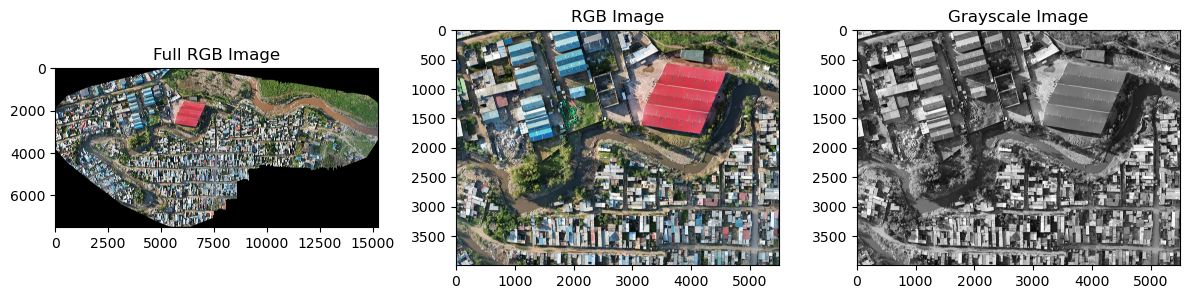

In [2]:
# load data
data_dir = Path("data")

img = rio.open(data_dir / "njiru_kenya.tif")
rgb = img.read([1, 2, 3])
rgb_crop = rgb[:, 1000:5000, 2500:8000] # crop for faster processing
rgb_plot = np.transpose(rgb_crop, (1, 2, 0))

# convert to grayscale
img_gray = 0.3 * rgb_crop[0] + 0.59 * rgb_crop[1] + 0.11 * rgb_crop[2] # 0.3R + 0.59G + 0.11B

# view
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(np.transpose(rgb, (1, 2, 0)))
plt.title('Full RGB Image')

plt.subplot(1, 3, 2)
plt.imshow(rgb_plot)
plt.title('RGB Image')

plt.subplot(1, 3, 3)
plt.imshow(img_gray, cmap='gray')
plt.title('Grayscale Image')

plt.tight_layout()
plt.show()

### Morphological tree construction  
Tree to be constructed is the Tree of Shapes (ToS) because it can capture both bright and dark areas

In [6]:
tree = sap.trees.TosTree(img_gray, adjacency=4, image_name=None)
print(tree)

TosTree{'adjacency': 4,
 'image.dtype': dtype('float64'),
 'image.shape': (4000, 5500),
 'image_hash': 'fef97492',
 'image_name': None,
 'num_nodes': 36264868}


In [ ]:
# save the tree
sap.save(data_dir / 'tree.npz', tree)

### Attribute design  
The following attributes are chosen given the context of our image in selectinng th eobjects trees, rivers, buildings and roads.  
| Attribute   | Reason         | 
|  -------    |    --------  |     
| Area        | Measures the spatial extent of connected components, allowing the pattern spectrum to capture the size <br> distribution of structures such as small roofs, large buildings, roads, and river segments.                      |
| Height      | Represents the gray-level difference between a node and its parent in the tree, capturing the contrast <br> and saliency of structures relative to their surroundings.                        |
| Elongation  | Describes the shape anisotropy of connected components, enabling discrimination between elongated structures <br> (e.g. roads and rivers) and more compact ones (e.g. buildings).                       |
| Volume      | Integrates both area and height, providing a measure of the overall importance or prominence of structures by <br> jointly considering their size and gray-level contrast.                       |

In [10]:
sap.Tree.available_attributes()

{'area': ['vertex_area=None', 'leaf_graph=None'],
 'child_number': [],
 'children_pair_sum_product': ['node_weights'],
 'compactness': ['area=None',
  'contour_length=None',
  'normalize=True',
  'leaf_graph=None'],
 'contour_length': ['vertex_perimeter=None',
  'edge_length=None',
  'leaf_graph=None'],
 'contour_strength': ['edge_weights',
  'vertex_perimeter=None',
  'edge_length=None',
  'leaf_graph=None'],
 'depth': [],
 'dynamics': ['altitudes', "increasing_altitudes='auto'"],
 'extinction_value': ['altitudes', 'attribute', "increasing_altitudes='auto'"],
 'extrema': ['altitudes'],
 'frontier_length': ['edge_length=None', 'leaf_graph=None'],
 'frontier_strength': ['edge_weights', 'leaf_graph'],
 'gaussian_region_weights_model': ['vertex_weights', 'leaf_graph=None'],
 'height': ['altitudes', "increasing_altitudes='auto'"],
 'lca_map': ['leaf_graph'],
 'mean_vertex_weights': ['vertex_weights', 'area=None', 'leaf_graph=None'],
 'moment_of_inertia': ['leaf_graph'],
 'piecewise_constan

In [14]:
# area attribute
area = tree.get_attribute('area')
print('area:', area, 'shape', area.shape)

# height attribute
height = tree.get_attribute('height')
print('height:', height, 'shape', height.shape)

# volume attribute
volume = tree.get_attribute('volume')  
print('volume:', volume, 'shape', volume.shape)

# elongation attribute (inverse of ecompactness )
elongation = 1 - tree.get_attribute('compactness')
print('elongation:', elongation, 'shape', elongation.shape)

area: [1.0e+00 1.0e+00 1.0e+00 ... 3.0e+00 1.0e+00 2.2e+07] shape (36264868,)
height: [  0.           0.           0.         ... -46.87802485 -30.30802485
 118.08197515] shape (36264868,)
volume: [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.23004075e+02
 3.03080248e+01 1.57110330e+09] shape (36264868,)
elongation: [0.         0.         0.         ... 0.25       0.         0.02493075] shape (36264868,)


### Attribute filtering

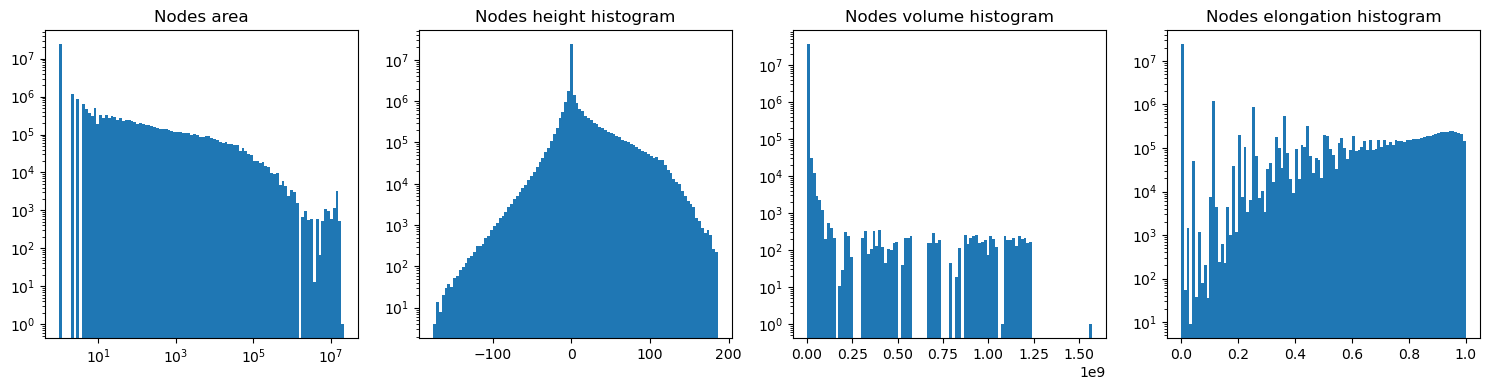

In [27]:
# visualize the attribute distribution
bins = np.geomspace(1, img_gray.size, 101)

plt.figure(figsize=(15, 4))

plt.subplot(1, 4, 1)
plt.hist(area, bins=bins, log=True)
plt.xscale('log')
plt.title('Nodes area')

plt.subplot(1,4,2)
plt.hist(height, bins=100, log=True)
plt.title('Nodes height histogram')

plt.subplot(1,4,3)
plt.hist(volume, bins=100, log=True)
plt.title('Nodes volume histogram')

plt.subplot(1,4,4)
plt.hist(elongation, bins=100, log=True)
plt.title('Nodes elongation histogram')

plt.tight_layout()
plt.show()


### Attribute Profile

### Pattern Spectrum

### Evaluating on different images

### Final analysis?